In [65]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.special as sp
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

pd.options.display.float_format = '{:.5f}'.format

In [66]:
# KOSPI 200 데이터 다운로드
start_date = "2023-06-12"
end_date = "2023-10-06"
kospi_data = yf.download('^KS200', start=start_date, end=end_date)

# 일일 수익률 계산
kospi_data['Daily_Return'] = kospi_data['Close'].pct_change()

[*********************100%%**********************]  1 of 1 completed


In [67]:
vol = pd.read_csv('./volatility.csv', encoding='cp949')
vol = vol[['일자', '평균내재변동성_전체', '역사적변동성_30일']]
vol['일자'] = pd.to_datetime(vol['일자'])
vol

,일자,평균내재변동성_전체,역사적변동성_30일
0,2023-11-08,16.10000,24.10000
1,2023-11-07,21.70000,24.00000
2,2023-11-06,22.60000,23.30000
3,2023-11-03,14.60000,18.40000
4,2023-11-02,15.40000,18.50000
...,...,...,...
243,2022-11-14,18.70000,20.30000
244,2022-11-11,18.80000,20.30000
245,2022-11-10,19.70000,19.40000
246,2022-11-09,15.60000,18.80000


In [68]:
vol = vol[::-1].reset_index(drop=True)
vol = vol[146:226].reset_index(drop=True)
vol

,일자,평균내재변동성_전체,역사적변동성_30일
0,2023-06-12,12.50000,10.00000
1,2023-06-13,13.00000,10.00000
2,2023-06-14,12.50000,10.20000
3,2023-06-15,12.20000,10.30000
4,2023-06-16,12.10000,10.20000
...,...,...,...
75,2023-09-26,12.90000,12.90000
76,2023-09-27,13.10000,12.20000
77,2023-10-04,16.80000,13.80000
78,2023-10-05,14.80000,13.70000


In [69]:
vkospi = pd.read_csv('./vkospi_vol.csv')
vkospi['날짜'] = pd.to_datetime(vkospi['날짜'])
vkospi

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2023-11-06,18.65000,16.85000,18.97000,16.66000,NaN,11.68%
1,2023-11-03,16.70000,17.01000,17.18000,16.67000,NaN,-4.52%
2,2023-11-02,17.49000,17.73000,17.88000,17.27000,NaN,-6.92%
3,2023-11-01,18.79000,19.09000,19.20000,18.74000,NaN,-5.53%
4,2023-10-31,19.89000,19.25000,20.12000,19.05000,NaN,-0.70%
...,...,...,...,...,...,...,...
101,2023-06-08,13.44000,13.53000,13.55000,13.11000,NaN,-1.97%
102,2023-06-07,13.71000,13.91000,13.91000,13.63000,NaN,-2.63%
103,2023-06-05,14.08000,14.16000,14.26000,13.99000,NaN,0.86%
104,2023-06-02,13.96000,14.06000,14.09000,13.82000,NaN,-2.72%


In [70]:
vkospi = vkospi[::-1].reset_index(drop=True)
vkospi = vkospi[6:86]
vkospi

,날짜,종가,시가,고가,저가,거래량,변동 %
6,2023-06-12,13.45000,13.64000,13.67000,13.45000,NaN,2.20%
7,2023-06-13,13.76000,13.80000,14.10000,13.70000,NaN,2.30%
8,2023-06-14,13.55000,13.81000,13.83000,13.42000,NaN,-1.53%
9,2023-06-15,13.25000,13.30000,13.43000,13.16000,NaN,-2.21%
10,2023-06-16,13.13000,13.61000,13.61000,13.11000,NaN,-0.91%
...,...,...,...,...,...,...,...
81,2023-09-26,14.74000,14.12000,14.88000,14.11000,NaN,4.54%
82,2023-09-27,15.08000,15.43000,15.43000,14.94000,NaN,2.31%
83,2023-10-04,18.09000,17.16000,18.13000,17.16000,NaN,19.96%
84,2023-10-05,17.34000,17.10000,17.62000,16.96000,NaN,-4.15%


In [71]:
df = pd.merge(vol, vkospi, left_on='일자', right_on='날짜', how='inner')
df = df[['일자', '평균내재변동성_전체', '역사적변동성_30일', '종가']]
columns = ['date', 'average_IV', 'HV_30', 'VKOSPI']
df.columns = columns

In [72]:
df

,date,average_IV,HV_30,VKOSPI
0,2023-06-12,12.50000,10.00000,13.45000
1,2023-06-13,13.00000,10.00000,13.76000
2,2023-06-14,12.50000,10.20000,13.55000
3,2023-06-15,12.20000,10.30000,13.25000
4,2023-06-16,12.10000,10.20000,13.13000
...,...,...,...,...
75,2023-09-26,12.90000,12.90000,14.74000
76,2023-09-27,13.10000,12.20000,15.08000
77,2023-10-04,16.80000,13.80000,18.09000
78,2023-10-05,14.80000,13.70000,17.34000


###### ======================================================
> 평균내재변동성, 역사적 변동성, vkospi 불러오기

In [73]:
ks200 = kospi_data[['Close', 'Daily_Return']]
daily_return = ks200['Daily_Return']
daily_return

Date
2023-06-12        NaN
2023-06-13    0.00528
2023-06-14   -0.00502
2023-06-15   -0.00424
2023-06-16    0.00577
               ...   
2023-09-25   -0.00133
2023-09-26   -0.01411
2023-09-27   -0.00058
2023-10-04   -0.02222
2023-10-05   -0.00272
Name: Daily_Return, Length: 79, dtype: float64

In [74]:
mean_list = []
k = 20
for i in range(1, len(ks200) + 1):
	sample_list = []
	sample_list = ks200['Daily_Return'][i:i+k]
	print(sample_list)
	sample_mean = round(np.mean(sample_list), 5)
	mean_list.append(sample_mean)
print(mean_list)

Date
2023-06-13    0.00528
2023-06-14   -0.00502
2023-06-15   -0.00424
2023-06-16    0.00577
2023-06-19   -0.00591
2023-06-20   -0.00160
2023-06-21   -0.00917
2023-06-22    0.00495
2023-06-23   -0.00783
2023-06-26    0.00570
2023-06-27   -0.00018
2023-06-28   -0.00561
2023-06-29   -0.00597
2023-06-30    0.00464
2023-07-03    0.01518
2023-07-04   -0.00434
2023-07-05   -0.00747
2023-07-06   -0.00838
2023-07-07   -0.01377
2023-07-10   -0.00220
Name: Daily_Return, dtype: float64
Date
2023-06-14   -0.00502
2023-06-15   -0.00424
2023-06-16    0.00577
2023-06-19   -0.00591
2023-06-20   -0.00160
2023-06-21   -0.00917
2023-06-22    0.00495
2023-06-23   -0.00783
2023-06-26    0.00570
2023-06-27   -0.00018
2023-06-28   -0.00561
2023-06-29   -0.00597
2023-06-30    0.00464
2023-07-03    0.01518
2023-07-04   -0.00434
2023-07-05   -0.00747
2023-07-06   -0.00838
2023-07-07   -0.01377
2023-07-10   -0.00220
2023-07-11    0.01868
Name: Daily_Return, dtype: float64
Date
2023-06-15   -0.00424
2023-06-16   

In [75]:
ks200['sample_mean'] = mean_list

/var/folders/y7/kjtd2q_j0c13ld5lwg5kd25r0000gn/T/ipykernel_9929/1269229196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ks200['sample_mean'] = mean_list


In [76]:
def rolling_realized_volatility(df):
    # 로그 수익률 계산
    df['LogReturn'] = np.log(df['Close']) - np.log(df['Close'].shift(1))
    
    # 롤링 기반 실현 변동성 계산
    df['RV'] = df['LogReturn'].rolling(22).apply(lambda x: np.sqrt(252 * np.sum(x**2) / 22))

    return df[['RV']]

# 각 행을 기준으로 해당 날짜의 변동성 계산
vol_df = rolling_realized_volatility(ks200)
print(vol_df)

                RV
Date              
2023-06-12     NaN
2023-06-13     NaN
2023-06-14     NaN
2023-06-15     NaN
2023-06-16     NaN
...            ...
2023-09-25 0.12340
2023-09-26 0.12735
2023-09-27 0.12521
2023-10-04 0.14597
2023-10-05 0.14577

[79 rows x 1 columns]


/var/folders/y7/kjtd2q_j0c13ld5lwg5kd25r0000gn/T/ipykernel_9929/3103856483.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LogReturn'] = np.log(df['Close']) - np.log(df['Close'].shift(1))
/var/folders/y7/kjtd2q_j0c13ld5lwg5kd25r0000gn/T/ipykernel_9929/3103856483.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RV'] = df['LogReturn'].rolling(22).apply(lambda x: np.sqrt(252 * np.sum(x**2) / 22))


In [77]:
vol_df = vol_df.dropna()

In [78]:
vol_df = round(vol_df * 100, 2)

In [79]:
vol_df

,RV
Date,
2023-07-12,12.66000
2023-07-13,12.64000
2023-07-14,13.76000
2023-07-17,13.74000
2023-07-18,13.80000
2023-07-19,13.65000
2023-07-20,13.72000
2023-07-21,13.38000
2023-07-24,13.41000


In [80]:
df = df[::-1]
df.head(3)

,date,average_IV,HV_30,VKOSPI
79,2023-10-06,14.60000,13.70000,17.39000
78,2023-10-05,14.80000,13.70000,17.34000
77,2023-10-04,16.80000,13.80000,18.09000


In [81]:
df = pd.merge(df, vol_df, left_on='date', right_on=vol_df.index, how='inner')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        57 non-null     datetime64[ns]
 1   average_IV  57 non-null     float64       
 2   HV_30       57 non-null     float64       
 3   VKOSPI      57 non-null     float64       
 4   RV          57 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.4 KB


In [83]:
df = df.set_index('date', drop=True)

In [84]:
df = df[['RV', 'average_IV', 'HV_30', 'VKOSPI']]

In [85]:
pct_df = df.pct_change()*100
pct_df

,RV,average_IV,HV_30,VKOSPI
date,,,,
2023-10-05,NaN,NaN,NaN,NaN
2023-10-04,0.13717,13.51351,0.72993,4.32526
2023-09-27,-14.24658,-22.02381,-11.59420,-16.63903
2023-09-26,1.67732,-1.52672,5.73770,-2.25464
2023-09-25,-3.06363,-6.20155,-3.10078,-4.34193
2023-09-22,7.13128,0.82645,0.80000,0.56738
2023-09-21,-0.22693,1.63934,0.00000,-1.55148
2023-09-20,-9.78014,-7.25806,-4.76190,-6.66189
2023-09-19,0.08403,-0.86957,0.83333,-0.61397


In [86]:
pct_df = pct_df.dropna()

In [87]:
std = StandardScaler()
data = std.fit_transform(df)

scaled_df = pd.DataFrame(data, columns=df.columns)

scaled_df

,RV,average_IV,HV_30,VKOSPI
0,0.94050,1.47464,0.42653,2.55259
1,0.95580,2.92135,0.52869,3.12141
2,-0.63532,0.24493,-1.10576,0.83853
3,-0.47468,0.10025,-0.39069,0.58067
4,-0.77302,-0.47843,-0.79930,0.09527
5,-0.09985,-0.40610,-0.69715,0.15594
6,-0.12280,-0.26142,-0.69715,-0.01091
7,-1.10960,-0.91245,-1.31007,-0.71625
8,-1.10195,-0.98478,-1.20792,-0.77693
9,-1.10195,-1.05712,-1.20792,-0.85277


In [88]:
corr = scaled_df.corr(method='pearson')
corr

,RV,average_IV,HV_30,VKOSPI
RV,1.00000,0.67911,0.65669,0.68285
average_IV,0.67911,1.00000,0.65456,0.92769
HV_30,0.65669,0.65456,1.00000,0.58199
VKOSPI,0.68285,0.92769,0.58199,1.00000


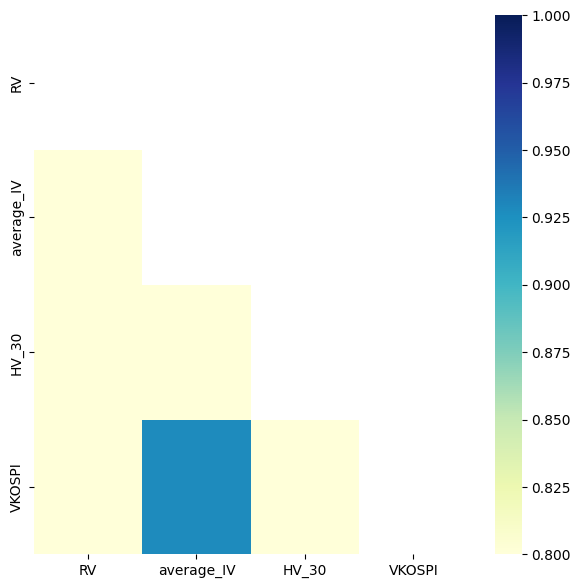

In [89]:
fig, ax = plt.subplots(figsize=(7, 7))

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, cmap='YlGnBu', vmin = 0.8, vmax = 1)   # 컬러바 범위 -1 ~ 1)

#sns.heatmap(scaled_df.corr(method='pearson'), mask=mask, annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

In [90]:
scaled_df.describe()

,RV,average_IV,HV_30,VKOSPI
count,57.00000,57.00000,57.00000,57.00000
mean,0.00000,-0.00000,-0.00000,0.00000
std,1.00889,1.00889,1.00889,1.00889
min,-1.95871,-1.78048,-2.12729,-1.70221
25%,-0.63532,-0.69544,-0.69715,-0.77693
50%,0.25204,-0.26142,-0.18638,-0.01091
75%,0.61157,0.38960,0.52869,0.67168
max,1.91200,2.92135,1.75453,3.12141


In [91]:
df.describe()

,RV,average_IV,HV_30,VKOSPI
count,57.00000,57.00000,57.00000,57.00000
mean,13.35053,12.76140,13.28246,13.97439
std,1.31887,1.39473,0.98762,1.33023
min,10.79000,10.30000,11.20000,11.73000
25%,12.52000,11.80000,12.60000,12.95000
50%,13.68000,12.40000,13.10000,13.96000
75%,14.15000,13.30000,13.80000,14.86000
max,15.85000,16.80000,15.00000,18.09000


In [92]:
result_df = pd.DataFrame(columns=['Column', 'R-squared', 'RMSE'])

# 'RV' 열을 기준으로 각 열과 회귀 모델 생성 및 평가
for col in ['average_IV', 'HV_30', 'VKOSPI']:
    # 독립 변수(X)와 종속 변수(y) 설정
    X = scaled_df[['RV']]
    y = scaled_df[col]
    
    # 회귀 모델 생성
    model = LinearRegression()
    model.fit(X, y)
    
    # 예측
    y_pred = model.predict(X)
    
    # 결정계수 계산
    r_squared = r2_score(y, y_pred)
    
    # RMSE 계산
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    
    # 결과를 데이터프레임에 추가
    result_df = pd.concat([result_df, pd.DataFrame({'Column': [col], 'R-squared': [r_squared], 'RMSE': [rmse]})], ignore_index=True)

# 결과 출력
print(result_df)


       Column  R-squared    RMSE
0  average_IV    0.46119 0.73404
1       HV_30    0.43124 0.75416
2      VKOSPI    0.46628 0.73056


In [93]:
len(vol_df)

57